# CWRU-dataset EDA Report preperation

In [1]:
import os
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def inspect_mat_structure(mat_filename):
    # Load the .mat file
    mat_data = loadmat(mat_filename)
    
    # Print the structure
    for key, value in mat_data.items():
        if isinstance(value, (list, tuple, dict, str, bytes, bytearray, memoryview)):
            print(f"Variable: {key} \t Type: {type(value)} \t Length: {len(value)}")
        else:
            print(f"Variable: {key} \t Type: {type(value)} \t Shape: {value.shape}")

# Inspect the structure of your .mat file
inspect_mat_structure('./Normal/100_Normal_3.mat')

Variable: __header__ 	 Type: <class 'bytes'> 	 Length: 74
Variable: __version__ 	 Type: <class 'str'> 	 Length: 3
Variable: __globals__ 	 Type: <class 'list'> 	 Length: 0
Variable: X100_DE_time 	 Type: <class 'numpy.ndarray'> 	 Shape: (485643, 1)
Variable: X100_FE_time 	 Type: <class 'numpy.ndarray'> 	 Shape: (485643, 1)
Variable: X100RPM 	 Type: <class 'numpy.ndarray'> 	 Shape: (1, 1)


In [ ]:
# import psycopg2
# from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
# from scipy.io import loadmat

# def create_database_if_not_exists(db_params):
#     # Connect to the default 'postgres' database
#     conn = psycopg2.connect(dbname='postgres', user=db_params['user'], password=db_params['password'], host=db_params['host'])
#     conn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)
#     cursor = conn.cursor()

#     # Check if the desired database exists
#     cursor.execute(f"SELECT 1 FROM pg_catalog.pg_database WHERE datname = '{db_params['dbname']}';")
#     exists = cursor.fetchone()
    
#     # If not, create the database
#     if not exists:
#         cursor.execute(f"CREATE DATABASE {db_params['dbname']};")
    
#     # Close the connection to 'postgres' database
#     cursor.close()
#     conn.close()

# def store_mat_to_db(mat_filename, db_params):
#     # Load the .mat file
#     mat_data = loadmat(mat_filename)
    
#     # Extract data from the .mat file
#     DE_time_data = mat_data['X100_DE_time']
#     FE_time_data = mat_data['X100_FE_time']
#     RPM_data = float(mat_data['X100RPM'][0][0])

#     # Connect to the newly created database
#     conn = psycopg2.connect(**db_params)
#     cursor = conn.cursor()

#     # Create the "Normal" table if it doesn't already exist
#     create_table_cmd = """
#     CREATE TABLE IF NOT EXISTS Normal (
#         id SERIAL PRIMARY KEY,
#         DE_time FLOAT,
#         FE_time FLOAT,
#         RPM FLOAT
#     );
#     """
#     cursor.execute(create_table_cmd)

#     # Insert data into the table
#     for de_value, fe_value in zip(DE_time_data, FE_time_data):
#         insert_cmd = f"INSERT INTO Normal (DE_time, FE_time, RPM) VALUES ({de_value[0]}, {fe_value[0]}, {RPM_data});"
#         cursor.execute(insert_cmd)

#     # Commit changes and close the connection
#     conn.commit()
#     cursor.close()
#     conn.close()

# # Database connection parameters
# db_params = {
#     'dbname': 'lab_3_assignment',
#     'user': 'postgres',
#     'password': 'your_postgres_password',
#     'host': 'localhost'
# }

# # Create the database if it doesn't exist
# create_database_if_not_exists(db_params)

# # Store the .mat data into the database
# store_mat_to_db('path_to_your_mat_file.mat', db_params)


In [2]:
import os
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def inspect_mat_structure(mat_filename):
    # Load the .mat file
    mat_data = loadmat(mat_filename)
    
    # Print the structure
    for key, value in mat_data.items():
        if isinstance(value, (list, tuple, dict, str, bytes, bytearray, memoryview)):
            print(f"Variable: {key} \t Type: {type(value)} \t Length: {len(value)}")
        else:
            print(f"Variable: {key} \t Type: {type(value)} \t Shape: {value.shape}")

# Inspect the structure of your .mat file
inspect_mat_structure('./Normal/100_Normal_3.mat')

Variable: __header__ 	 Type: <class 'bytes'> 	 Length: 74
Variable: __version__ 	 Type: <class 'str'> 	 Length: 3
Variable: __globals__ 	 Type: <class 'list'> 	 Length: 0
Variable: X100_DE_time 	 Type: <class 'numpy.ndarray'> 	 Shape: (485643, 1)
Variable: X100_FE_time 	 Type: <class 'numpy.ndarray'> 	 Shape: (485643, 1)
Variable: X100RPM 	 Type: <class 'numpy.ndarray'> 	 Shape: (1, 1)


In [4]:
import pandas as pd
import numpy as np
from scipy.io import loadmat

# Load the MATLAB file
mat_data = loadmat('./Normal/100_Normal_3.mat')

# Extracting data from the loaded MATLAB structure
X100_DE_time = mat_data['X100_DE_time']
X100_FE_time = mat_data['X100_FE_time']
X100RPM_value = mat_data['X100RPM'][0, 0]

# Convert the data to a DataFrame
df = pd.DataFrame({
    'X100_DE_time': X100_DE_time.flatten(),
    'X100_FE_time': X100_FE_time.flatten(),
    'X100RPM': np.full(X100_DE_time.shape[0], X100RPM_value)
})

df.head()  # Display the first few rows of the dataframe


,X100_DE_time,X100_FE_time,X100RPM
0,0.014603,0.192922,1725
1,0.054449,0.164364,1725
2,0.107646,0.090811,1725
3,0.133722,0.086496,1725
4,0.112652,0.099235,1725


In [5]:
import matplotlib.pyplot as plt

df.describe()

,X100_DE_time,X100_FE_time,X100RPM
count,485643.000000,485643.000000,485643.0
mean,0.012459,0.031896,1725.0
std,0.064695,0.075270,0.0
min,-0.306456,-0.301402,1725.0
25%,-0.030458,-0.019107,1725.0
50%,0.014394,0.031435,1725.0
75%,0.056952,0.082593,1725.0
max,0.283717,0.384816,1725.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485643 entries, 0 to 485642
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   X100_DE_time  485643 non-null  float64
 1   X100_FE_time  485643 non-null  float64
 2   X100RPM       485643 non-null  uint16 
dtypes: float64(2), uint16(1)
memory usage: 8.3 MB


<Axes: xlabel='X100_DE_time', ylabel='X100_FE_time'>

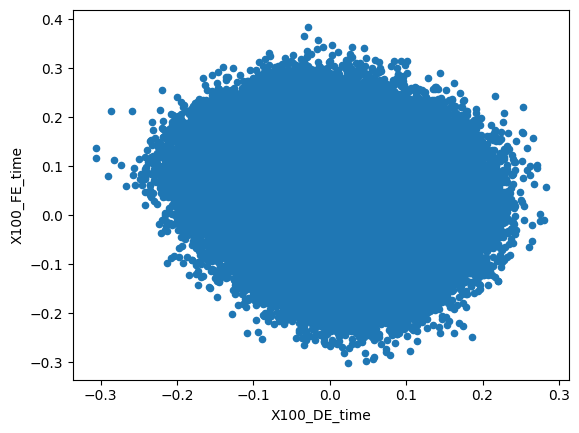

In [10]:
df.plot.scatter("X100_DE_time", "X100_FE_time")

In [11]:
df.corr()

,X100_DE_time,X100_FE_time,X100RPM
X100_DE_time,1.000000,-0.173496,NaN
X100_FE_time,-0.173496,1.000000,NaN
X100RPM,NaN,NaN,NaN


(-0.2, 0.2)

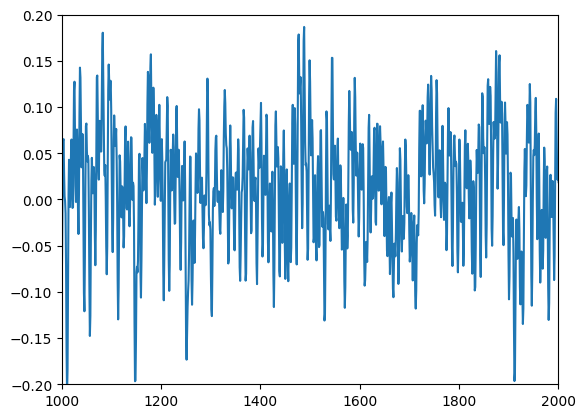

In [23]:
plt.plot(range(len(df["X100_DE_time"])), df["X100_DE_time"])
plt.xlim((1000, 2000))
plt.ylim((-0.2, 0.2))

In [24]:
from numpy.fft import fft

In [25]:
X100_DE = fft(df["X100_DE_time"])

In [26]:
X100_DE

array([6050.39022277+3.13082893e-14j,  237.29872379+5.94044304e+01j,
        267.31785168+2.11668944e+01j, ..., -102.7448346 +2.23786478e+02j,
        267.31785168-2.11668944e+01j,  237.29872379-5.94044304e+01j])

(0.0, 200.0)

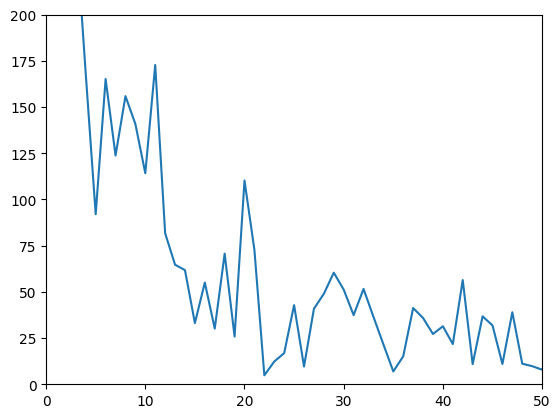

In [45]:
plt.plot(np.abs(X100_DE))
plt.xlim((0, 50))
plt.ylim((0, 200))

In [44]:
1730/60

28.833333333333332